In [ ]:
#import
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
## Upload từ drive
from google.colab import drive
drive.mount('/content/drive/')
##
import math
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load và đọc data

df = pd.read_csv("/content/drive/My Drive/MA-CK-2/MA CK 2/WTC.csv")
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,21300,WTC,21300,21300,18600,2600
1,11/6/2020,19200,WTC,18000,19200,18000,1000
2,10/6/2020,16700,WTC,16700,16700,16700,900
3,9/6/2020,15300,WTC,13600,15300,13600,1300
4,8/6/2020,13500,WTC,13500,13500,13500,500


In [ ]:
#Nhất quán định dạng data và kiểm tra null
df["CLOSING PRICE"] = pd.to_numeric(df["CLOSING PRICE"])
df["HIGH"] = pd.to_numeric(df["HIGH"])
df["LOW"] = pd.to_numeric(df["LOW"])
df["VOLUME"] = pd.to_numeric(df["VOLUME"])
df.isna().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           1254 non-null   object
 1   CLOSING PRICE  1254 non-null   int64 
 2   TICKER         1254 non-null   object
 3   OPEN           1254 non-null   int64 
 4   HIGH           1254 non-null   int64 
 5   LOW            1254 non-null   int64 
 6   VOLUME         1254 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 68.7+ KB


In [ ]:
#Chia training set và data set

data = df.filter(['CLOSING PRICE'] + ['VOLUME'] +['OPEN'] +['HIGH'] +['LOW'])
dataset = data.values
a = df.filter(['CLOSING PRICE'])
training_data_len = math.ceil(len(dataset ) * .8)

kq = a.values
training_data_len
test_len =len(dataset) -  training_data_len
kq.size

1254

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range =(0,1))
scaler2 = MinMaxScaler(feature_range =(0,1))
scaled_kq = scaler2.fit_transform(kq)
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[1.        , 0.07330138, 1.        , 1.        , 1.        ],
       [0.89230769, 0.02819284, 0.83076923, 0.89230769, 0.96428571],
       [0.76410256, 0.02537356, 0.76410256, 0.76410256, 0.88690476],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# Chia training set theo x và y
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data) - 3):
    x_train.append(train_data[i-60:i, :])
    y_train.append(scaled_kq[i + 3, 0])


In [ ]:
scaled_kq

array([[1.        ],
       [0.89230769],
       [0.76410256],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
#Chuyển sang mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape du lieu de co the su dung vao model LSTM cua python
temp = x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))
temp.shape

(941, 60, 5)

In [ ]:
#xay dung LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = False, input_shape = (60,5)))
model.add(Dense(1))

In [ ]:
#Su dung model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [ ]:
#Bat dau huan luyen
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
941/941 [==============================] - 19s 20ms/step - loss: 5.0418e-04
Epoch 2/2
941/941 [==============================] - 18s 19ms/step - loss: 2.7171e-04


In [ ]:
#Tao test set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = kq[training_data_len + 3:,:]
for i in range(60, len(test_data) - 3):
    x_test.append(test_data[i-60:i, :])

In [ ]:
#Chuyen sang 3d array de su dung voi LSTM
x_test = np.array(x_test)
x_test.shape


(247, 60, 5)

In [ ]:
#Tao hypothesis
predictions = model.predict(x_test)
predictions = scaler2.inverse_transform(predictions)



In [ ]:
predictions.shape

(247, 1)

In [ ]:
#Tinh cost function
mse = np.sqrt(np.mean(predictions - y_test)**2) 
mse



74.00384546194965

      CLOSING PRICE
3             15300
4             13500
5             14200
6             12400
7             12400
...             ...
999            3600
1000           3600
1001           3600
1002           3600
1003           3600

[1001 rows x 1 columns]
      CLOSING PRICE  Predictions
1007           3600  3652.285156
1008           3600  3652.281250
1009           3600  3652.278809
1010           3600  3652.277100
1011           3600  3652.275879
...             ...          ...
1249           1800  1828.393311
1250           1800  1828.393311
1251           1800  1828.393311
1252           1800  1828.393188
1253           1800  1828.393188

[247 rows x 2 columns]


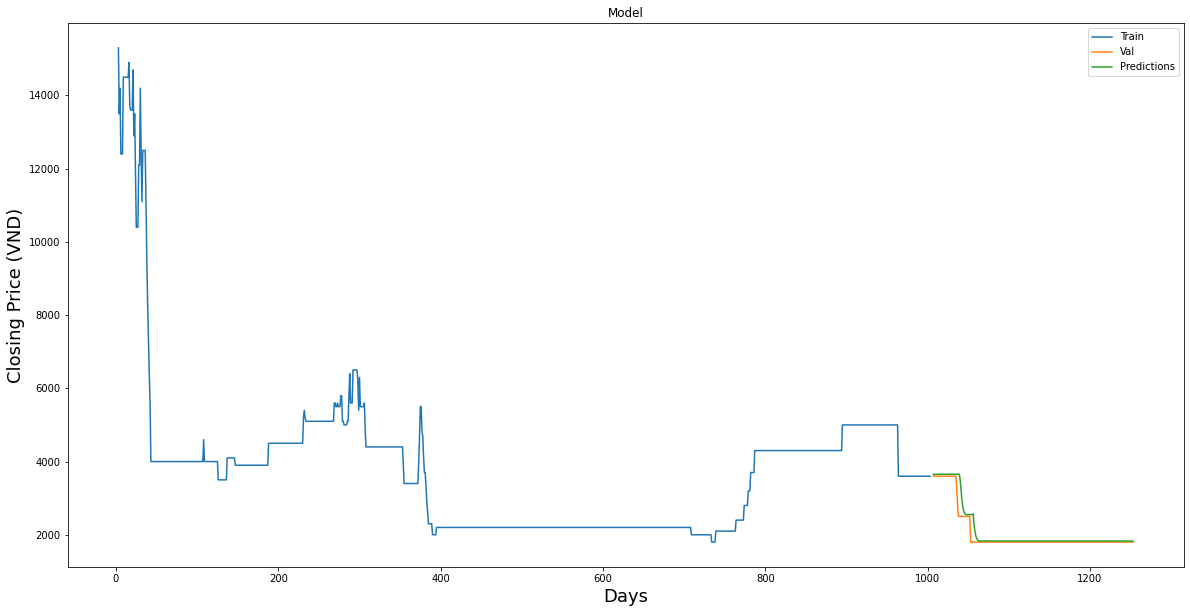

In [ ]:
#Plot/Create the data for the graph
train = a[3:training_data_len]
print(train)
valid = a[training_data_len + 3:]
valid['Predictions'] = predictions
print(valid)
# 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Closing Price (VND)', fontsize=18)
plt.plot(train['CLOSING PRICE'])
plt.plot(valid[['CLOSING PRICE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()